**About the Dataset:** The data includes transactions  made by European credit card users in September 2013, due of confidentiality concerns, the publishers didn't give the original features or much background on the data. It only has numerical input variables on which PCA transformation was done

The dataset has a big imbalance between fraud and non-fraud cases, so we can't rely on accuracy from a confusion matrix as a metric. Instead, we'll use the Area Under the Precision-Recall Curve (AUPRC).

Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Data Desciption**

* Time: Time at which the transaction occurs
* V1 to V28 : 28 Features (PCA)
* Amount: The amount of the transaction.
* Class (fraud label): A binary variable, with the value for a legitimate transaction, or the value for a fraudulent transaction.

* **Objective :** Anonymized credit card transactions labeled as fraudulent or genuine

# Table of Content





* **Importing Python Librabries**
* **Exploratory Data Analysis**
* **Sampling Dataset**
* **Model Buidling**

___

In [1]:
# Importing Libraries

In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

# Exploratory Data Analysis (EDA)

In [3]:
df =pd.read_csv("creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking the number of rows and columns in the datase

print(f"rows: {df.shape[0]}\ncolumns: {df.shape[1]}")

rows: 284807
columns: 31


In [5]:
# checking for the data types 
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* No null values in the dataset

In [7]:
#checking for the class balance ratio
print(df["Class"].value_counts())
print("\nClass Ratio\n",df["Class"].value_counts()/df.shape[0])

0    284315
1       492
Name: Class, dtype: int64

Class Ratio
 0    0.998273
1    0.001727
Name: Class, dtype: float64


* Since our goal is to detect fraud activities, it's crucial to note that the dataset is highly imbalanced. This imbalance means that our model might focus more on learning about non-fraudulent activities and less on fraudulent ones.

### Statistical Analysis

In [8]:
# seperating class varibles  to understand about the statistical analysis
Non_fraudulent = df[df["Class"]==0]
fraudulent= df[df["Class"]==1]

In [9]:
Non_fraudulent.shape, fraudulent.shape

((284315, 31), (492, 31))

In [10]:
Non_fraudulent["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraudulent["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# we can see that in Non Fraudulent and Fraudulent the means are different.
The transac????
but median is low so what doe this mean as inference 

____

## Method 1 : 


#### Performing random sampling of the non-fraudulent class to match the number of rows with the fraudulent class.

In [12]:
undersample_m = Non_fraudulent.sample(n=fraudulent.shape[0],random_state=3)
undersample_m

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
156961,109263.0,1.833227,0.364711,0.451166,4.091917,-0.227509,0.374196,-0.583237,0.023417,0.954938,...,0.041577,0.485685,0.189123,-0.084402,-0.264453,-0.009945,-0.006484,-0.034535,18.96,0
179147,123946.0,2.085175,0.393051,-4.508201,-0.311771,3.510117,2.453299,0.220469,0.543377,-0.100434,...,-0.067217,-0.072642,-0.036584,0.529693,0.414685,0.735870,-0.058233,-0.026658,0.76,0
15067,26414.0,-0.262444,-3.162121,-0.294218,-0.796267,-1.940072,-0.380838,0.388393,-0.228600,1.992874,...,0.574583,0.075166,-0.887120,-0.008395,0.270159,-0.040588,-0.102476,0.160309,816.62,0
23204,32637.0,-0.883467,-0.211395,1.359311,-1.221876,0.498644,0.080569,1.007131,-0.109152,-0.354324,...,-0.099961,-0.615560,0.241685,-0.836969,-0.307358,0.594305,-0.218686,-0.112627,164.01,0
111394,72214.0,1.075827,-0.274463,1.093012,1.532927,-0.583176,1.082587,-0.733305,0.520508,1.189631,...,-0.403918,-0.757279,0.052991,-0.332710,0.403760,-0.502030,0.081161,0.011272,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222979,143204.0,2.239052,-1.468257,-0.415760,-1.651330,-1.518224,-0.328507,-1.458644,0.004632,-1.217365,...,-0.371511,-0.623488,0.412349,-0.404534,-0.595912,-0.483846,0.034075,-0.047606,15.95,0
67355,52491.0,1.314442,-0.765168,0.119475,-0.787712,-0.501423,0.448607,-0.723523,0.170127,-0.630945,...,0.017943,0.081010,-0.139929,-0.784148,0.550084,-0.182887,0.019586,-0.004491,36.28,0
166502,118117.0,0.146613,1.232617,-1.281238,-0.092007,0.962813,-0.449265,0.361553,-1.860332,0.161723,...,1.471837,-0.374324,-0.377807,-0.846036,1.083432,0.829297,0.214370,0.285213,29.56,0
101600,67890.0,1.197949,0.343806,0.287047,0.641670,-0.114203,-0.579018,0.079723,-0.117485,-0.105816,...,-0.244870,-0.647599,0.141032,0.058506,0.170133,0.120287,-0.002370,0.030734,9.99,0


In [13]:
# Concatenating undersampled data non-fraudulent data with fradulent

df_new= pd.concat([fraudulent, undersample_m], axis=0)
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [14]:
#Confirming if both have equal amount of classes within them
df_new["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

#### Comparison of class (Fraudulent and non Fraudulent) means before and after sampling to ensure minimal variation.

In [15]:
pd.DataFrame({"Before" : df.groupby("Class")["Amount"].mean(), "After": df_new.groupby("Class")["Amount"].mean()         })

,Before,After
Class,,
0,88.291022,95.142337
1,122.211321,122.211321


In [16]:
# so our sampling is good as we can see both means are same else resample
#? is this a good way

### Seperating Dependant and Independant Varibles

In [17]:
x= df_new.drop(columns=["Class"])
y= df_new["Class"]

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75, stratify=y, random_state=1)
#stratify makes sure that test data contains both the classes
#random_state makes sure that there is reproducibility across all machines

In [19]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((738, 30), (738,), (246, 30), (246,))

### Model Creation

In [20]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
#Training 
ypredict= lr.predict(xtrain)
print(classification_report(ytrain,ypredict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       369
           1       0.97      0.91      0.94       369

    accuracy                           0.94       738
   macro avg       0.94      0.94      0.94       738
weighted avg       0.94      0.94      0.94       738



In [22]:
#Testing
ypredict= lr.predict(xtest)
print(classification_report(ytest,ypredict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       123
           1       0.96      0.89      0.92       123

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246



# Begin

___

## Seperating Dependant and Independant Varibles

In [23]:
x=df.drop(columns="Class")
y=df["Class"]

In [24]:
### Train Test Split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,stratify=y, random_state=1)

In [25]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((213605, 30), (71202, 30), (213605,), (71202,))

In [26]:
df["Class"].value_counts()/df.shape[0] #orginal 

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [27]:
ytrain.value_counts()/df.shape[0]*100 #ytrain class ratio

0    74.870351
1     0.129561
Name: Class, dtype: float64

In [28]:
ytest.value_counts()/df.shape[0]*100 #ytest class ratio

0    24.956901
1     0.043187
Name: Class, dtype: float64

# Model : With Default Imbalanced Data

In [29]:
#Creating a User defined function for for model validation so that we can avoid rewriting the code
def model_validation(model,x_train,x_test,y_train,y_test):
    global m
    m=model
    m.fit(x_train,y_train)
    
    print("\033[1mTraining Metrics\033[0m")
    ypred_train= m.predict(xtrain)
    print("\nConfusion Matrix \n",confusion_matrix(ytrain,ypred_train))
    print("\nClassification Report",classification_report(ytrain,ypred_train))
    
    print("\033[1m_________________________________________________________________________ \n")
    
    print("\033[1mTesting Metrics\033[0m")
    ypred_test= m.predict(xtest)
    print("\nConfusion Matrix \n",confusion_matrix(ytest,ypred_test))
    print("\nClassification Report",classification_report(ytest,ypred_test))    


In [30]:
model_validation(LogisticRegression(),xtrain,xtest,ytrain,ytest)

Training Metrics

Confusion Matrix 
 [[213149     87]
 [   156    213]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.71      0.58      0.64       369

    accuracy                           1.00    213605
   macro avg       0.85      0.79      0.82    213605
weighted avg       1.00      1.00      1.00    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[71059    20]
 [   37    86]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.70      0.75       123

    accuracy                           1.00     71202
   macro avg       0.91      0.85      0.88     71202
weighted avg       1.00      1.00      1.00     71202



# Model : Appling Different ways to Remove Imbalance in  Data

### Lets explore different sampling techniques:

 * Manually Random undersampling the data
 
 * Undersampling 
 * Oversampling
 * SMOTE (Synthesis Minority Oversampling Technique)

### Lets Try different ways to balance the data

## METHOD 1:  Undersampling using Manual Method

**Note you can use RandomUnderSampler from the imblearn.undersampling instead of this**. This is just to illustrate one method

In [31]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [32]:
non_fraudulent= df[df["Class"]==0]
non_fraudulent.shape

(284315, 31)

In [33]:
fraudulent= df[df["Class"]==1]
fraudulent.shape

(492, 31)

### Undersampling the ``non_fraudlent`` sample same as fraudulent sample

In [34]:
undersampled_non_fraudulent=non_fraudulent.sample(fraudulent.shape[0],random_state=1)
undersampled_non_fraudulent

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26476,34090.0,1.384778,-0.613943,-0.473714,-1.080493,-0.134557,0.127233,-0.322239,-0.005842,-1.099339,...,-0.926508,-2.437317,0.107510,-1.453848,0.010721,0.602221,-0.085445,-0.006771,55.90,0
232704,147272.0,-0.662865,-0.063548,-0.453997,0.365725,-0.053082,-1.877818,1.369474,-0.415603,0.164133,...,0.319064,1.076870,0.572212,0.805659,-0.418046,-0.197208,0.118548,0.085739,173.05,0
161997,114733.0,-1.072320,-1.383812,1.110494,-3.057725,0.355135,-0.062749,-0.135126,-0.519193,-1.626258,...,-0.226405,0.265666,-0.437952,0.378339,-0.278275,-0.400838,-0.468408,-0.180677,88.00,0
176374,122737.0,-0.580157,0.568520,2.000309,-0.551757,0.202593,0.304296,0.763987,-0.039123,0.280374,...,-0.218156,-0.535974,-0.167347,0.548246,0.296848,-0.467760,-0.107231,-0.141449,49.98,0


In [35]:
df_new= pd.concat([undersampled_non_fraudulent,fraudulent],axis=0) #default axis =0
df_new.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0


In [36]:
df_new.shape

(984, 31)

In [37]:
df_new.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

***Separating the features (X) and the target variable (Y), followed by splitting the data into training and testing sets for Method 1 only***

In [38]:
x_m1=df_new.drop(columns="Class")
y_m1= df_new["Class"]

In [41]:
x_m1.shape,y_m1.shape

((984, 30), (984,))

In [42]:
xtrain_m1,xtest_m1,ytrain_m1,ytest_m1 = train_test_split(x_m1,y_m1,train_size=0.8,stratify=y_m1)

In [43]:
xtrain_m1.shape,xtest_m1.shape,ytrain_m1.shape,ytest_m1.shape

((787, 30), (197, 30), (787,), (197,))

In [44]:
model_validation(LogisticRegression(),xtrain_m1,xtest_m1,ytrain_m1,ytest_m1)

Training Metrics

Confusion Matrix 
 [[202303  10933]
 [    28    341]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.95      0.97    213236
           1       0.03      0.92      0.06       369

    accuracy                           0.95    213605
   macro avg       0.52      0.94      0.52    213605
weighted avg       1.00      0.95      0.97    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[67540  3539]
 [    8   115]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.93      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.94      0.52     71202
weighted avg       1.00      0.95      0.97     71202



___

#### Note here onwards we can going to the acutal xtrain,xtest ytrain, ytest data, not the one we used in the Method 1

## METHOD 2: Undersampling - RandomUnderSample

RandomUnderSampler(
    *,
    sampling_strategy='auto',
    random_state=None,
    replacement=False,
)

**sampling_strategy :**

- When ``float``, it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling. Therefore, the ratio is expressed as


 **- ``float`` is only available for binary classification. An error is raised for multi-class classification.**


- When ``str``, specify the class targeted by the resampling. The
      number of samples in the different classes will be equalized.
      Possible choices are:

   * ``'minority'``: resample only the minority class;

   *        ``'not minority'``: resample all classes but the minority class;

   *    ``'not majority'``: resample all classes but the majority class;

   *    ``'all'``: resample all classes;

   *    ``'auto'``: equivalent to ``'not majority'.
   
   

**replacement:**

    bool, default=False
    Whether the sample is with or without replacement.

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
undersampling = RandomUnderSampler()

In [47]:
xtrain_b, ytrain_b = undersampling.fit_resample(xtrain,ytrain)

In [48]:
ytrain.value_counts() #orginal

0    213236
1       369
Name: Class, dtype: int64

In [49]:
ytrain_b.value_counts() #after undersampling

0    369
1    369
Name: Class, dtype: int64

In [50]:
model_validation(LogisticRegression(),xtrain_b, xtest,ytrain_b, ytest)

Training Metrics

Confusion Matrix 
 [[204646   8590]
 [    31    338]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98    213236
           1       0.04      0.92      0.07       369

    accuracy                           0.96    213605
   macro avg       0.52      0.94      0.53    213605
weighted avg       1.00      0.96      0.98    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[68233  2846]
 [    6   117]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.95      0.08       123

    accuracy                           0.96     71202
   macro avg       0.52      0.96      0.53     71202
weighted avg       1.00      0.96      0.98     71202



## METHOD 3:  Oversampling - RandomOverSampler

RandomOverSampler(*,
* sampling_strategy='auto',
* random_state=None,
* shrinkage=None)

**sampling_strategy :**

- When ``float``, it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling. Therefore, the ratio is expressed as


 **- ``float`` is only available for binary classification. An error is raised for multi-class classification.**


- When ``str``, specify the class targeted by the resampling. The
      number of samples in the different classes will be equalized.
      Possible choices are:

   * ``'minority'``: resample only the minority class;

   *        ``'not minority'``: resample all classes but the minority class;

   *    ``'not majority'``: resample all classes but the majority class;

   *    ``'all'``: resample all classes;

   *    ``'auto'``: equivalent to ``'not majority'.
   

In [51]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
random_oversampling= RandomOverSampler()

In [53]:
xtrain_b,ytrain_b=random_oversampling.fit_resample(xtrain,ytrain)

In [54]:
ytrain.value_counts() #orginal

0    213236
1       369
Name: Class, dtype: int64

In [55]:
ytrain_b.value_counts() #after oversampling

0    213236
1    213236
Name: Class, dtype: int64

In [56]:
model_validation(LogisticRegression(),xtrain_b, xtest,ytrain_b, ytest)

Training Metrics

Confusion Matrix 
 [[205193   8043]
 [    35    334]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98    213236
           1       0.04      0.91      0.08       369

    accuracy                           0.96    213605
   macro avg       0.52      0.93      0.53    213605
weighted avg       1.00      0.96      0.98    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[68425  2654]
 [    9   114]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.93      0.08       123

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202



## METHOD 4:  SMOTE (Synthetic Minority Oversampling Technique)

In [57]:
from imblearn.over_sampling import SMOTE

SMOTE(
    *,
    sampling_strategy='auto',
    random_state=None,
    k_neighbors=5,
    n_jobs=None,
)


**sampling_strategy :**


- When ``float``, it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling. Therefore, the ratio is expressed as


 **- ``float`` is only available for binary classification. An error is raised for multi-class classification.**


- When ``str``, specify the class targeted by the resampling. The
      number of samples in the different classes will be equalized.
      Possible choices are:

   * ``'minority'``: resample only the minority class;

   *        ``'not minority'``: resample all classes but the minority class;

   *    ``'not majority'``: resample all classes but the majority class;

   *    ``'all'``: resample all classes;

   *    ``'auto'``: equivalent to ``'not majority'.
   
   
**k_neighbors :** 

    int or object, default=5
    The nearest neighbors used to define the neighborhood of samples to use
    to generate the synthetic samples
    
    
**n_jobs :**

    int, default=None
    Number of CPU cores used during the cross-validation loop.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. 

In [58]:
smote = SMOTE(sampling_strategy='auto') #default

In [59]:
xtrain_b , ytrain_b = smote.fit_resample(xtrain,ytrain)

In [60]:
ytrain.value_counts() #orginal

0    213236
1       369
Name: Class, dtype: int64

In [61]:
ytrain_b.value_counts() #after smote

0    213236
1    213236
Name: Class, dtype: int64

In [62]:
model_validation(LogisticRegression(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[209335   3901]
 [    41    328]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99    213236
           1       0.08      0.89      0.14       369

    accuracy                           0.98    213605
   macro avg       0.54      0.94      0.57    213605
weighted avg       1.00      0.98      0.99    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[69809  1270]
 [   11   112]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.91      0.15       123

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.57     71202
weighted avg       1.00      0.98      0.99     71202



***Trying Smote sampling stratergy  as 0.7 (make minority class  70% of the majority class)***

***Note this works only with binary classification , not for mulit-class classifiaction***

In [63]:
smote= SMOTE(sampling_strategy=0.7)  # note you can do this in RandomOversampler and RandomUnderSampler

In [64]:
xtrain_b,ytrain_b = smote.fit_resample(xtrain,ytrain)

In [65]:
ytrain.value_counts() #orginal

0    213236
1       369
Name: Class, dtype: int64

In [66]:
ytrain_b.value_counts() #after smote

0    213236
1    149265
Name: Class, dtype: int64

## Logistic Regression

In [67]:
model_validation(LogisticRegression(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[209551   3685]
 [    43    326]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99    213236
           1       0.08      0.88      0.15       369

    accuracy                           0.98    213605
   macro avg       0.54      0.93      0.57    213605
weighted avg       1.00      0.98      0.99    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[69876  1203]
 [   10   113]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.92      0.16       123

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.57     71202
weighted avg       1.00      0.98      0.99     71202



# Trying More Advanced Models

## KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier

In [80]:
model_validation(KNeighborsClassifier(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[206385   6851]
 [     1    368]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.97      0.98    213236
           1       0.05      1.00      0.10       369

    accuracy                           0.97    213605
   macro avg       0.53      0.98      0.54    213605
weighted avg       1.00      0.97      0.98    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[67677  3402]
 [   59    64]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.02      0.52      0.04       123

    accuracy                           0.95     71202
   macro avg       0.51      0.74      0.51     71202
weighted avg       1.00      0.95      0.97     71202



## Niave Baye

In [91]:
# Naive Bayes is a classification algorithm based on Bayes' theorem

 GaussianNB(*, 
   priors=None,
   var_smoothing=1e-09)

In [96]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
#GaussianNB

In [82]:
model_validation(GaussianNB(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[211645   1591]
 [    97    272]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.99      1.00    213236
           1       0.15      0.74      0.24       369

    accuracy                           0.99    213605
   macro avg       0.57      0.86      0.62    213605
weighted avg       1.00      0.99      0.99    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[70535   544]
 [   20   103]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.16      0.84      0.27       123

    accuracy                           0.99     71202
   macro avg       0.58      0.91      0.63     71202
weighted avg       1.00      0.99      0.99     71202



## Decsion Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model_validation(DecisionTreeClassifier(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[213236      0]
 [     0    369]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00       369

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[70924   155]
 [   15   108]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.41      0.88      0.56       123

    accuracy                           1.00     71202
   macro avg       0.71      0.94      0.78     71202
weighted avg       1.00      1.00      1.00     71202



## Random Forest Classifer

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model_validation(RandomForestClassifier(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[213236      0]
 [     0    369]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00       369

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[71066    13]
 [   14   109]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.89      0.89       123

    accuracy                           1.00     71202
   macro avg       0.95      0.94      0.94     71202
weighted avg       1.00      1.00      1.00     71202



# Bagging

BaggingClassifier(
    
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)

**The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.**

In [1]:
from sklearn.ensemble import BaggingClassifier

In [95]:
model_validation(BaggingClassifier(estimator=KNeighborsClassifier()), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[206385   6851]
 [     1    368]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.97      0.98    213236
           1       0.05      1.00      0.10       369

    accuracy                           0.97    213605
   macro avg       0.53      0.98      0.54    213605
weighted avg       1.00      0.97      0.98    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[67677  3402]
 [   59    64]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.02      0.52      0.04       123

    accuracy                           0.95     71202
   macro avg       0.51      0.74      0.51     71202
weighted avg       1.00      0.95      0.97     71202



# Boosting

## AdaBoost 

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
model_validation(AdaBoostClassifier(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[211068   2168]
 [    40    329]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.99      0.99    213236
           1       0.13      0.89      0.23       369

    accuracy                           0.99    213605
   macro avg       0.57      0.94      0.61    213605
weighted avg       1.00      0.99      0.99    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[70337   742]
 [   12   111]]

Classification Report               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.13      0.90      0.23       123

    accuracy                           0.99     71202
   macro avg       0.56      0.95      0.61     71202
weighted avg       1.00      0.99      0.99     71202



## Gradient Boost

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
model_validation(GradientBoostingClassifier(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[212296    940]
 [    33    336]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.26      0.91      0.41       369

    accuracy                           1.00    213605
   macro avg       0.63      0.95      0.70    213605
weighted avg       1.00      1.00      1.00    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[70767   312]
 [   11   112]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.26      0.91      0.41       123

    accuracy                           1.00     71202
   macro avg       0.63      0.95      0.70     71202
weighted avg       1.00      1.00      1.00     71202



## XGBoost 

In [74]:
from xgboost import XGBClassifier

In [75]:
model_validation(XGBClassifier(), xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[213236      0]
 [     0    369]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00       369

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[71064    15]
 [   15   108]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.88      0.88       123

    accuracy                           1.00     71202
   macro avg       0.94      0.94      0.94     71202
weighted avg       1.00      1.00      1.00     71202



## Stacking 

In [76]:
from sklearn.ensemble import StackingClassifier

StackingClassifier(

    estimators,
    final_estimator=None,
    *,
    cv=None,
    stack_method='auto',
    n_jobs=None,
    passthrough=False,
    verbose=0,
)


estimators : list of (str, estimator)
    Base estimators which will be stacked together. Each element of the
    list is defined as a tuple of string (i.e. name) and an estimator
    instance. An estimator can be set to 'drop' using `set_params`.

    The type of estimator is generally expected to be a classifier.
    However, one can pass a regressor for some use case (e.g. ordinal
    regression).

final_estimator : estimator, default=None
    A classifier which will be used to combine the base estimators.
    
   **The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`**

In [85]:
base_models= [ ("DecisionTreeClassifier", DecisionTreeClassifier()),
                ("KNeighborsClassifier",KNeighborsClassifier()),
              ("Naive Bayes", GaussianNB())]

In [86]:
model_validation(StackingClassifier(estimators=base_models, final_estimator=LogisticRegression()), 
                 xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[213236      0]
 [     0    369]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00       369

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[70922   157]
 [   14   109]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.41      0.89      0.56       123

    accuracy                           1.00     71202
   macro avg       0.70      0.94      0.78     71202
weighted avg       1.00      1.00      1.00     71202



## Votting

VotingClassifier(

    estimators,
    *,
    voting='hard',
    weights=None,
    n_jobs=None,
    flatten_transform=True,
    verbose=False,
)

In [87]:
from sklearn.ensemble import VotingClassifier
#VotingClassifier

In [89]:
base_models= [ ("DecisionTreeClassifier", DecisionTreeClassifier()),
                ("KNeighborsClassifier",KNeighborsClassifier()),
              ("Naive Bayes", GaussianNB())]

In [90]:
model_validation(VotingClassifier(estimators=base_models), 
                 xtrain_b,xtest,ytrain_b,ytest)

Training Metrics

Confusion Matrix 
 [[213152     84]
 [     1    368]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.81      1.00      0.90       369

    accuracy                           1.00    213605
   macro avg       0.91      1.00      0.95    213605
weighted avg       1.00      1.00      1.00    213605

_________________________________________________________________________ 

Testing Metrics

Confusion Matrix 
 [[71019    60]
 [   17   106]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.64      0.86      0.73       123

    accuracy                           1.00     71202
   macro avg       0.82      0.93      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#lets plot 

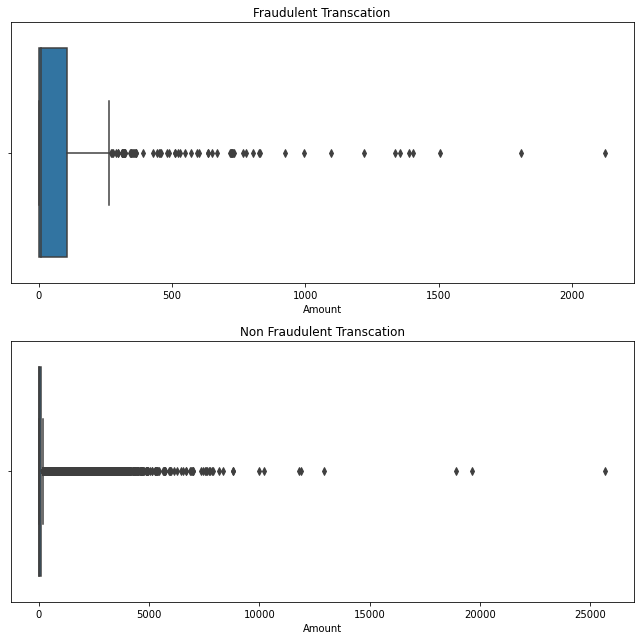

In [46]:
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
sns.boxplot(data=fraudulent, x="Amount")
plt.title("Fraudulent Transcation")

plt.subplot(2,1,2)
sns.boxplot(data=Non_fraudulent, x="Amount")
plt.title("Non Fraudulent Transcation")
plt.tight_layout()

plt.show()